In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib
from sqlalchemy import create_engine
import scipy.stats as st
from scipy.stats import linregress

Using matplotlib backend: MacOSX


In [2]:
#import csv file
train_file = pd.read_csv("train.csv")
train_new = train_file.drop(columns=['PassengerId','Ticket','Cabin'])
#train_new = train_file.fillna('0')
train_new.head(10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [3]:
df = train_new.mean()
df =pd.DataFrame(df)
df = df.rename(columns={0:'Mean'})
big_picture = df.sort_values(by='Mean',ascending=False)
big_picture

,Mean
Fare,32.204208
Age,29.699118
Pclass,2.308642
SibSp,0.523008
Survived,0.383838
Parch,0.381594


In [4]:
df = train_new.describe().round(2)
df = df.rename(columns={'SibSp':'Siblings', 'Parch':'Parents'})
df

,Survived,Pclass,Age,Siblings,Parents,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


([<matplotlib.axis.XTick at 0x1a1a5dc610>,
 <a list of 9 Text xticklabel objects>)

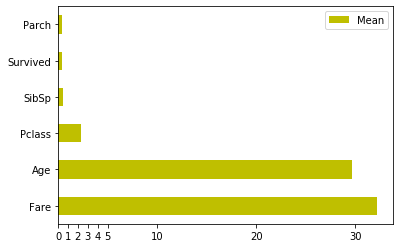

In [5]:
#colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k','p']), None, len(df)))
big_picture.plot(kind='barh',width = 0.5, color = ('y'))
plt.xticks([0,1,2,3,4,5,10,20,30])

In [6]:
# Create age bins
bins = [0,10,20,30,40,50,60,70,80]
group_labels = ['0~10','10~20','20~30','30~40','40~50','50~60','60~70','70~80']
train_new["Age"] = pd.cut(train_new["Age"], bins, labels=group_labels)
train_new.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,20~30,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30~40,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,20~30,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,30~40,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,30~40,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,50~60,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,0~10,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,20~30,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,10~20,1,0,30.0708,C


In [7]:
train_age = train_new.groupby('Age').agg({'Survived':'mean'})
train_class = train_new.groupby('Pclass').agg({'Survived':'mean'})
train_sex = train_new.groupby('Sex').agg({'Survived':'mean'})
train_age = train_age.reset_index()
train_class = train_class.reset_index()
train_sex = train_sex.reset_index()
train_sex
#train_class

,Sex,Survived
0,female,0.742038
1,male,0.188908


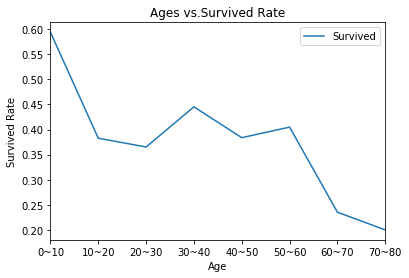

In [8]:
#survival rate by age 
age = train_age.plot(x ='Age', y='Survived', kind = 'line')
plt.title('Ages vs.Survived Rate')
plt.ylabel("Survived Rate")
plt.savefig("../Graphs/Ages vs.Survived Rate.png")

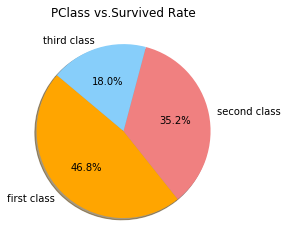

In [9]:
#survival portion by class
pclass = ["first class", "second class", "third class"]
survived = [0.629630, 0.472826, 0.242363]
colors = ["orange", "lightcoral", "lightskyblue"]

plt.pie(survived, labels=pclass, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('PClass vs.Survived Rate')
plt.savefig("../Graphs/PClass vs.Survived Rate.png")

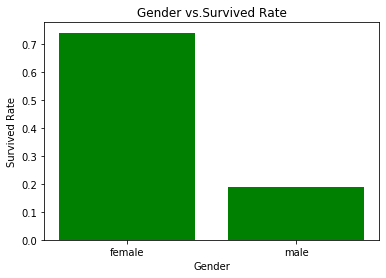

In [10]:
plt.bar(train_sex['Sex'],train_sex['Survived'], color='g')
plt.title('Gender vs.Survived Rate')
plt.xlabel("Gender")
plt.ylabel("Survived Rate")
plt.savefig("../Graphs/Gender vs.Survived Rate.png")

In [11]:
#combination of survival%
df = train_new.groupby(['Pclass','Sex','Age']).agg({'Survived':['sum','count']}).reset_index()

df['Survive%'] = np.round(df['Survived']['sum']/df['Survived']['count']*100, 2)

df.sort_values(by='Survive%', ascending=False)

Pclass     Sex    Age Survived       Survive%
                              sum count         
24      2    male   0~10      9.0   9.0   100.00
16      2  female   0~10      8.0   8.0   100.00
3       1  female  30~40     24.0  24.0   100.00
38      3  female  60~70      1.0   1.0   100.00
5       1  female  50~60     11.0  11.0   100.00
6       1  female  60~70      2.0   2.0   100.00
8       1    male   0~10      2.0   2.0   100.00
1       1  female  10~20     13.0  13.0   100.00
17      2  female  10~20      8.0   8.0   100.00
2       1  female  20~30     20.0  21.0    95.24
19      2  female  30~40     16.0  17.0    94.12
4       1  female  40~50     12.0  13.0    92.31
20      2  female  40~50      9.0  10.0    90.00
18      2  female  20~30     25.0  28.0    89.29
21      2  female  50~60      2.0   3.0    66.67
11      1    male  30~40     13.0  25.0    52.00
33      3  female  10~20     13.0  25.0    52.00
34      3  female  20~30     16.0  32.0    50.00
32      3  female   0~10     11.0  22.0    50.00
10      1    male  20~30      9.0  19.0    47.37
35      3  female  30~40      6.0  14.0    42.86
9       1    male  10~20      2.0   5.0    40.00
12      1    male  40~50      9.0  24.0    37.50
40      3    male   0~10      8.0  22.0    36.36
15      1    male  70~80      1.0   3.0    33.33
30      2    male  60~70      1.0   3.0    33.33
13      1    male  50~60      4.0  14.0    28.57
42      3    male  20~30     14.0  97.0    14.43
43      3    male  30~40      7.0  49.0    14.29
41      3    male  10~20      7.0  54.0    12.96
27      2    male  30~40      3.0  26.0    11.54
28      2    male  40~50      1.0   9.0    11.11
25      2    male  10~20      1.0  10.0    10.00
44      3    male  40~50      2.0  22.0     9.09
46      3    male  60~70      0.0   2.0     0.00
45      3    male  50~60      0.0   5.0     0.00
0       1  female   0~10      0.0   1.0     0.00
36      3  female  40~50      0.0   8.0     0.00
29      2    male  50~60      0.0   9.0     0.00
26      2    male  20~30      0.0  33.0     0.00
14      1    male  60~70      0.0   9.0     0.00
47      3    male  70~80      0.0   2.0     0.00
7       1  female  70~80      NaN   NaN      NaN
22      2  female  60~70      NaN   NaN      NaN
23      2  female  70~80      NaN   NaN      NaN
31      2    male  70~80      NaN   NaN      NaN
37      3  female  50~60      NaN   NaN      NaN
39      3  female  70~80      NaN   NaN      NaN

In [12]:
# 100%
df = df[df['Survived']['count'] > 1 ]
df = df.drop(columns =['Survived'])
survived_group = df[df['Survive%']== 100.00]
survived_group = survived_group.set_index('Survive%')
survived_group
#female in first class or young women in second class, you will have the biggest survived rate

/Users/jane/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


,Pclass,Sex,Age
,,,
Survive%,,,
100.0,1,female,10~20
100.0,1,female,30~40
100.0,1,female,50~60
100.0,1,female,60~70
100.0,1,male,0~10
100.0,2,female,0~10
100.0,2,female,10~20
100.0,2,male,0~10


In [13]:
# 0%
unsurvived_group = df[df['Survive%']== 0.00]
unsurvived_group = unsurvived_group.set_index('Survive%')
unsurvived_group
# male over 50 - in 3rd class, not likly to servive

,Pclass,Sex,Age
,,,
Survive%,,,
0.0,1,male,60~70
0.0,2,male,20~30
0.0,2,male,50~60
0.0,3,female,40~50
0.0,3,male,50~60
0.0,3,male,60~70
0.0,3,male,70~80
